# Paleta de Cores

Para manter a identidade visual das visualizações, foi definida uma paleta de cores personalizada composta por tons de azul, cinza, vermelho, laranja e verde. Essa paleta será utilizada nos gráficos ao longo do notebook.

In [50]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

# Bibliotecas

Neste projeto utilizamos um conjunto de bibliotecas essenciais para análise de dados, manipulação de informações e visualização gráfica. A seguir, descrevemos brevemente a função de cada uma delas:


* **pandas (pd):** Usada para manipulação e análise de dados tabulares. Permite trabalhar com DataFrames, realizar limpeza, seleção, agregação e transformação dos dados.

* **NumPy (np):** Suporte a operações matemáticas e tratamento eficiente de arrays numéricos multidimensionais.

* **requests:** Biblioteca utilizada para realizar requisições HTTP, permitindo acessar APIs e coletar dados diretamente da web.

* **json:** Usada para manipular dados em formato JSON, comum em respostas de APIs e arquivos de configuração.

* **matplotlib.pyplot (plt):** Ferramenta base para a criação de gráficos estáticos em 2D. Permite personalização completa das visualizações.

* **plotly.express (px):** Biblioteca voltada para visualizações interativas e dinâmicas, ideal para explorar dados de forma mais rica.

* **seaborn (sns):** Extensão do Matplotlib focada em gráficos estatísticos e visualizações mais elegantes, facilitando análise exploratória.


Essas bibliotecas serão utilizadas ao longo do notebook para realizar desde a coleta e preparação dos dados até a criação de gráficos e visualizações mais avançadas.

### Import

In [51]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from matplotlib.ticker import FuncFormatter

# Outros dados (PIX)

Fonte: https://dadosabertos.bcb.gov.br/dataset/pix

In [52]:
# url = "https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/ChavesPix(Data=@Data)?@Data='2020-11-16'&$format=json&$select=ISPB,Nome,NaturezaUsuario,TipoChave,qtdChaves"

# resp = requests.get(url)
# data_json = resp.json()

# pix_nat = pd.DataFrame(data_json["value"])

# pix_nat.head()

In [53]:
# url = "https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/EstatisticasTransacoesPix(Database=@Database)?@Database='202011'&$format=json&$select=AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE"

# resp = requests.get(url)
# data_json = resp.json()

# pix = pd.DataFrame(data_json["value"])

# pix.head()

# Dados

 ### Fonte dos dados

**Fonte API — Plataforma Olinda do Banco Central**

Os dados utilizados também fazem uso da API da Plataforma Olinda do Banco Central, por meio do serviço MPV_DadosAbertos, versão v1:

* URL base da API (OData):
https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/

* Protocolo: OData (Open Data Protocol), que permite fazer consultas REST padronizadas.

* Formato de resposta: aceitam JSON, XML, CSV, entre outros.

**“Recurso” (endpoint) usado:**

Meios de pagamentos mensais:

* Recurso MeiosdePagamentosMensalDA para dados mensais de boletos, transferências, etc.

### Dicionário dos dados

`AnoMes:` período de referência no formato AAAAMM (ano + mês).

`quantidadePix:` quantidade total de transações Pix realizadas no mês.

`valorPix:` valor financeiro total movimentado por transações Pix no mês.

`quantidadeTED:` quantidade de transações realizadas via TED (Transferência Eletrônica Disponível).

`valorTED:` valor financeiro total movimentado via TED no mês.

`quantidadeTEC:` quantidade de transações realizadas via TEC (Transferência Eletrônica de Créditos).

`valorTEC:` valor financeiro total movimentado via TEC no mês.

`quantidadeCheque:` número total de cheques compensados no período.

`valorCheque:` valor financeiro total compensado via cheques no mês.

`quantidadeBoleto:` quantidade de boletos liquidados no período.

`valorBoleto:` valor financeiro total pago por boletos no mês.

`quantidadeDOC:` quantidade total de transações via DOC (Documento de Ordem de Crédito).

`valorDOC:` valor financeiro total movimentado via DOC no mês.

### Dados brutos

In [54]:
# Endpoint utilizado
url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosMensalDA(AnoMes=@AnoMes)?@AnoMes='201001'&$format=json&$select=AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC"

# Dataframe com os dados brutos
dados = pd.read_json(url)
df = pd.json_normalize(dados['value'])

df.head()

,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC
0,202510,7271603.27,3317544.40,69508.97,3935395.10,0.0,0.0,8133.43,34584.96,347805.90,570061.34,0.0,0.0
1,202509,6853600.84,3180234.59,67787.76,3935730.15,0.0,0.0,8401.46,36257.82,349079.13,569213.66,0.0,0.0
2,202508,6975792.67,3035727.36,64506.60,3700999.64,0.0,0.0,7764.15,34009.59,328959.80,522435.28,0.0,0.0
3,202507,6681904.28,3058009.50,67192.89,3915166.65,0.0,0.0,8507.87,35797.81,353819.55,564569.38,0.0,0.0
4,202506,6463470.81,2868306.07,62477.43,3742911.28,0.0,0.0,8217.12,34182.86,338127.37,523439.24,0.0,0.0


### Primeiras análises

Não há dados nulos neste conjunto de dados, e os tipos de dados estão de acordo com o esperado.

Posteriormente os dados da coluna `AnoMes` será formatada para o tipo data, para melhor análises e visualizações temporais.

In [55]:
# Verificando existência de dados nulos, e tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AnoMes            190 non-null    object 
 1   quantidadePix     190 non-null    float64
 2   valorPix          190 non-null    float64
 3   quantidadeTED     190 non-null    float64
 4   valorTED          190 non-null    float64
 5   quantidadeTEC     190 non-null    float64
 6   valorTEC          190 non-null    float64
 7   quantidadeCheque  190 non-null    float64
 8   valorCheque       190 non-null    float64
 9   quantidadeBoleto  190 non-null    float64
 10  valorBoleto       190 non-null    float64
 11  quantidadeDOC     190 non-null    float64
 12  valorDOC          190 non-null    float64
dtypes: float64(12), object(1)
memory usage: 19.4+ KB


Existem 190 meses neste conjunto de dados, significando que temos dados que vão de Janeiro de 2010 à Outubro de 2025.

In [56]:
# Quantidade de meses
df['AnoMes'].count()

np.int64(190)

In [57]:
# Confirmando primeiro e último registro (Ano + Mês)
print(f'Primeiro registro: {df['AnoMes'].min()}')
print(f'Último registro: {df['AnoMes'].max()}')

Primeiro registro: 201001
Último registro: 202510


### Análises temporais

Conversão para os dados da coluna `AnoMes` para tipo data (neste caso, period[M]), separado mês a mês.

In [58]:
# Conversão do tipo de dado da coluna AnoMes
df['AnoMes'] = pd.to_datetime(df['AnoMes'].astype(str), format='%Y%m').dt.to_period('M')
df.head()

,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC
0,2025-10,7271603.27,3317544.40,69508.97,3935395.10,0.0,0.0,8133.43,34584.96,347805.90,570061.34,0.0,0.0
1,2025-09,6853600.84,3180234.59,67787.76,3935730.15,0.0,0.0,8401.46,36257.82,349079.13,569213.66,0.0,0.0
2,2025-08,6975792.67,3035727.36,64506.60,3700999.64,0.0,0.0,7764.15,34009.59,328959.80,522435.28,0.0,0.0
3,2025-07,6681904.28,3058009.50,67192.89,3915166.65,0.0,0.0,8507.87,35797.81,353819.55,564569.38,0.0,0.0
4,2025-06,6463470.81,2868306.07,62477.43,3742911.28,0.0,0.0,8217.12,34182.86,338127.37,523439.24,0.0,0.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   AnoMes            190 non-null    period[M]
 1   quantidadePix     190 non-null    float64  
 2   valorPix          190 non-null    float64  
 3   quantidadeTED     190 non-null    float64  
 4   valorTED          190 non-null    float64  
 5   quantidadeTEC     190 non-null    float64  
 6   valorTEC          190 non-null    float64  
 7   quantidadeCheque  190 non-null    float64  
 8   valorCheque       190 non-null    float64  
 9   quantidadeBoleto  190 non-null    float64  
 10  valorBoleto       190 non-null    float64  
 11  quantidadeDOC     190 non-null    float64  
 12  valorDOC          190 non-null    float64  
dtypes: float64(12), period[M](1)
memory usage: 19.4 KB


Arrendomento das valores das colunas 'quantidade' para tipo inteiro.

In [60]:
inteiros = ['quantidadePix',	'quantidadeTED',	'quantidadeTEC',
       'quantidadeCheque',	'quantidadeBoleto',	'quantidadeDOC']

df[inteiros] = round(df[inteiros],0)
df[inteiros] = df[inteiros].astype('int64')
df.head()

,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC
0,2025-10,7271603,3317544.40,69509,3935395.10,0,0.0,8133,34584.96,347806,570061.34,0,0.0
1,2025-09,6853601,3180234.59,67788,3935730.15,0,0.0,8401,36257.82,349079,569213.66,0,0.0
2,2025-08,6975793,3035727.36,64507,3700999.64,0,0.0,7764,34009.59,328960,522435.28,0,0.0
3,2025-07,6681904,3058009.50,67193,3915166.65,0,0.0,8508,35797.81,353820,564569.38,0,0.0
4,2025-06,6463471,2868306.07,62477,3742911.28,0,0.0,8217,34182.86,338127,523439.24,0,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   AnoMes            190 non-null    period[M]
 1   quantidadePix     190 non-null    int64    
 2   valorPix          190 non-null    float64  
 3   quantidadeTED     190 non-null    int64    
 4   valorTED          190 non-null    float64  
 5   quantidadeTEC     190 non-null    int64    
 6   valorTEC          190 non-null    float64  
 7   quantidadeCheque  190 non-null    int64    
 8   valorCheque       190 non-null    float64  
 9   quantidadeBoleto  190 non-null    int64    
 10  valorBoleto       190 non-null    float64  
 11  quantidadeDOC     190 non-null    int64    
 12  valorDOC          190 non-null    float64  
dtypes: float64(6), int64(6), period[M](1)
memory usage: 19.4 KB


Agrupamento do dados por `Ano` para análise temporal inicial.

In [62]:
df_ano = df.copy()

colunas = ['quantidadePix',	'valorPix',	'quantidadeTED',	'valorTED',	'quantidadeTEC',
           'valorTEC',	'quantidadeCheque',	'valorCheque',	'quantidadeBoleto',	'valorBoleto',
           'quantidadeDOC',	'valorDOC']

df_ano['Ano'] = df['AnoMes'].dt.year
df_ano = df_ano.groupby('Ano')[colunas].sum()
df_ano

,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC
Ano,,,,,,,,,,,,
2010,0,0.00,94168,9012911.37,2646,2885.42,1108866,1109243.59,1793406,2069312.16,197707,182272.47
2011,0,0.00,113442,10187969.87,3101,3393.34,998792,1129220.95,1921298,2352879.58,212751,185932.86
2012,0,0.00,133257,11534462.66,6746,8270.62,902848,1139550.36,2102214,2602742.49,244630,209025.13
2013,0,0.00,199696,13569819.23,6626,8509.35,825783,1191037.66,2253654,2694212.25,256790,190816.15
2014,0,0.00,257399,13967952.26,7514,11879.35,743104,1170546.06,2364292,2712835.82,264225,186080.05
2015,0,0.00,329710,15246550.07,9766,18714.36,655930,1099916.64,2407558,2766624.97,238842,171595.79
2016,0,0.00,472586,15459040.65,8777,16707.16,562643,976751.67,2441251,2825978.70,189766,155377.53
2017,0,0.00,599059,16413626.05,9142,18260.17,479359,876643.91,2479436,2909296.13,198335,155262.87
2018,0,0.00,702488,18880678.95,9665,19502.68,416156,831707.88,2607139,3126835.74,221477,161227.51


### Análise anual (valores)

In [63]:
valores = ['valorPix',	'valorTED',	'valorTEC',
           'valorCheque', 'valorBoleto','valorDOC']

In [64]:
valor_ano = df_ano[valores]
valor_ano = valor_ano.reset_index()
valor_ano = valor_ano.rename(columns={'valorPix':'Pix',	'valorTED':'TED',	'valorTEC':'TEC',
                          'valorCheque':'Cheque', 'valorBoleto':'Boleto','valorDOC':'DOC'})
valor_ano.head()

,Ano,Pix,TED,TEC,Cheque,Boleto,DOC
0,2010,0.0,9012911.37,2885.42,1109243.59,2069312.16,182272.47
1,2011,0.0,10187969.87,3393.34,1129220.95,2352879.58,185932.86
2,2012,0.0,11534462.66,8270.62,1139550.36,2602742.49,209025.13
3,2013,0.0,13569819.23,8509.35,1191037.66,2694212.25,190816.15
4,2014,0.0,13967952.26,11879.35,1170546.06,2712835.82,186080.05


In [65]:
valor_ano_mod = valor_ano.copy()
valor_ano_mod['Outros'] = valor_ano_mod['TEC'] + valor_ano_mod['Cheque'] + valor_ano_mod['DOC']
valor_ano_mod = valor_ano_mod.drop(['TEC', 'Cheque', 'DOC'], axis=1)
valor_ano_mod = valor_ano_mod.melt(id_vars='Ano', var_name='MeioPagamento', value_name='Valor')
valor_ano_mod

,Ano,MeioPagamento,Valor
0,2010,Pix,0.00
1,2011,Pix,0.00
2,2012,Pix,0.00
3,2013,Pix,0.00
4,2014,Pix,0.00
...,...,...,...
59,2021,Outros,728701.69
60,2022,Outros,687306.99
61,2023,Outros,604013.37
62,2024,Outros,468556.75


In [66]:
valor_ano_mod['Valor'] = round(valor_ano_mod['Valor']/1e6, 2)

In [67]:
valor_ano_mod = valor_ano_mod[~((valor_ano_mod['MeioPagamento'] == 'Pix') & (valor_ano_mod['Ano'] < 2020))]

In [68]:
valor_ano_mod.head()

,Ano,MeioPagamento,Valor
10,2020,Pix,0.15
11,2021,Pix,5.20
12,2022,Pix,10.89
13,2023,Pix,17.12
14,2024,Pix,26.40


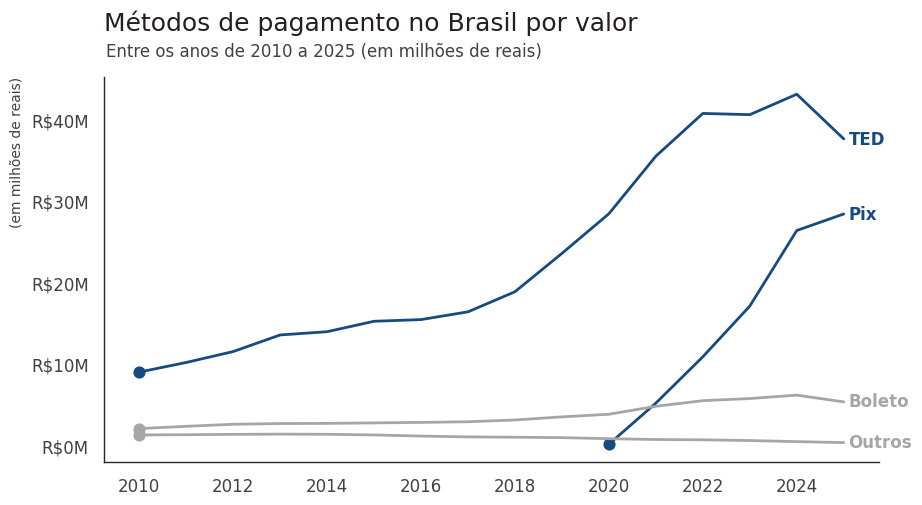

In [69]:
cores = [AZUL1, AZUL1, CINZA4, CINZA4]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=valor_ano_mod,
                  x='Ano',
                  y=valor_ano_mod['Valor'],
                  hue='MeioPagamento',
                  palette=cores,
                  lw=2,
                  legend=False)
marks = [0]

for line, cor in zip(ax.lines, cores):
    line.set_marker("o")
    line.set_markersize(8)
    line.set_markevery(marks)
    line.set_markerfacecolor(cor)
    line.set_markeredgecolor(cor)

ax.set_title('Métodos de pagamento no Brasil por valor',
             loc='left',
             fontsize=18,
             color=CINZA1,
             y=1.10)

ax.text(0.565, 1.065, 'Entre os anos de 2010 a 2025 (em milhões de reais)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

meios = valor_ano_mod['MeioPagamento'].unique()

for meio, cor in zip(meios, cores):
    df_temp = valor_ano_mod[valor_ano_mod['MeioPagamento'] == meio]
    x_final = df_temp['Ano'].max()
    y_final = df_temp[df_temp['Ano'] == x_final]['Valor'].values[0]
    ax.text(
        x_final + 0.1,
        y_final,
        str(meio),
        color=cor,
        fontsize=12,
        va='center',
        fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('(em milhões de reais)', fontsize=10, color=CINZA2, labelpad=5, loc='top')
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R${x:.0f}M'))

sns.despine()
for spine in ax.spines.values():
    spine.set_linewidth(1)

plt.show()

### Análise 2020 a 2025 (valores)

In [70]:
valor_ano_mod_2 = valor_ano.copy()
valor_ano_mod_2 = valor_ano_mod_2.melt(id_vars='Ano', var_name='MeioPagamento', value_name='Valor')
valor_ano_mod_2 = valor_ano_mod_2[~((valor_ano_mod_2['MeioPagamento'] == 'Pix') & (valor_ano_mod_2['Ano'] < 2020))]
valor_ano_mod_2.head()

,Ano,MeioPagamento,Valor
10,2020,Pix,149894.91
11,2021,Pix,5204116.61
12,2022,Pix,10890538.57
13,2023,Pix,17117257.36
14,2024,Pix,26404064.59


In [71]:
doc_valor = valor_ano_mod_2.query('MeioPagamento == "DOC"')
doc_valor = doc_valor.copy()
doc_valor['Valor'] = round(doc_valor['Valor']/1000,2)

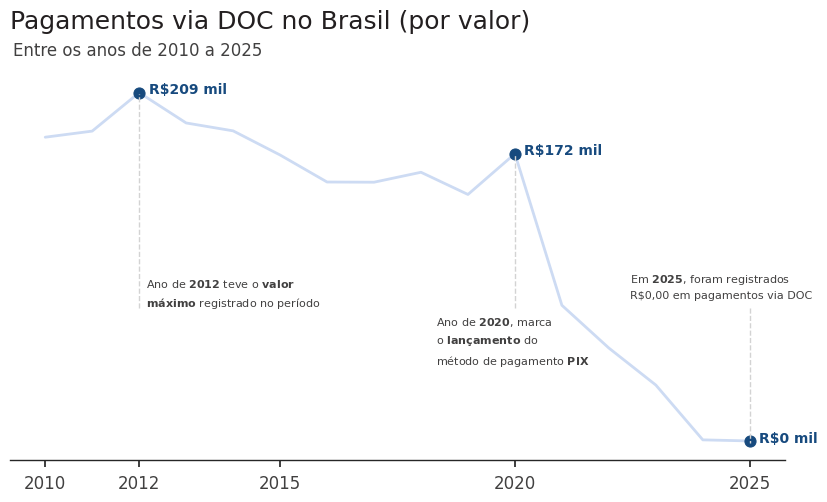

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=doc_valor,
                  x='Ano',
                  y=doc_valor['Valor'],
                  color=AZUL6,
                  lw=2,
                  legend=False)
marks = [2,10,15]

for line, cor in zip(ax.lines, cores):
    line.set_marker("o")
    line.set_markersize(8)
    line.set_markevery(marks)
    line.set_markerfacecolor(AZUL1)
    line.set_markeredgecolor(AZUL1)

ax.set_title('Pagamentos via DOC no Brasil (por valor)',
             loc='left',
             fontsize=18,
             color=CINZA1,
             y=1.10)

ax.text(0.325, 1.065, 'Entre os anos de 2010 a 2025',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R${x:.0f} mil'))

ax.tick_params(axis='x', which='both', bottom=True, top=False, length=5)
anos = doc_valor['Ano'].unique()
ax.set_xticks([2010, 2012, 2015, 2020, 2025])

sns.despine(left=True)

for spine in ax.spines.values():
    spine.set_linewidth(1)

mark_text = [2, 10, 15]

for i in mark_text:
    x = doc_valor['Ano'].iloc[i]
    y = doc_valor['Valor'].iloc[i]

    ax.text(x + 0.2, y - 0.5,
            s=f'R${y:.0f} mil',
            color=AZUL1,
            weight='bold',
            fontsize=10)

for i in mark_text:
    ax.vlines(x=doc_valor['Ano'].iloc[i],
              ymin=doc_valor['Valor'].min() + 80,
              ymax=doc_valor['Valor'].iloc[i] - 1,
              colors='lightgray',
              linestyles='dashed',
              linewidth=1)

ax.text(0.175, 0.4, 'Ano de $\\bf{2012}$ teve o $\\bf{valor}$ \n$\\bf{máximo}$ registrado no período',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1.5,
        color=CINZA2)

ax.text(0.55, 0.25, 'Ano de $\\bf{2020}$, marca\no $\\bf{lançamento}$ do\nmétodo de pagamento $\\bf{PIX}$',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1.5,
        color=CINZA2)

ax.text(0.8, 0.42, 'Em $\\bf{2025}$, foram registrados\nR$0,00 em pagamentos via DOC',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1.5,
        color=CINZA2)

ax.yaxis.set_ticklabels([])

plt.show()

### Análise anual (quantidade)

In [73]:
qtds = ['quantidadePix', 'quantidadeTED', 'quantidadeTEC',
        'quantidadeCheque', 'quantidadeBoleto', 'quantidadeDOC']

qtd_ano = df_ano[qtds]
qtd_ano = qtd_ano.reset_index()
qtd_ano = qtd_ano.rename(columns={'quantidadePix':'Pix', 'quantidadeTED':'TED',
                                  'quantidadeTEC':'TEC', 'quantidadeCheque':'Cheque',
                                  'quantidadeBoleto':'Boleto', 'quantidadeDOC':'DOC'})
qtd_ano.head()

,Ano,Pix,TED,TEC,Cheque,Boleto,DOC
0,2010,0,94168,2646,1108866,1793406,197707
1,2011,0,113442,3101,998792,1921298,212751
2,2012,0,133257,6746,902848,2102214,244630
3,2013,0,199696,6626,825783,2253654,256790
4,2014,0,257399,7514,743104,2364292,264225


In [74]:
qtd_ano

,Ano,Pix,TED,TEC,Cheque,Boleto,DOC
0,2010,0,94168,2646,1108866,1793406,197707
1,2011,0,113442,3101,998792,1921298,212751
2,2012,0,133257,6746,902848,2102214,244630
3,2013,0,199696,6626,825783,2253654,256790
4,2014,0,257399,7514,743104,2364292,264225
5,2015,0,329710,9766,655930,2407558,238842
6,2016,0,472586,8777,562643,2441251,189766
7,2017,0,599059,9142,479359,2479436,198335
8,2018,0,702488,9665,416156,2607139,221477
9,2019,0,1033377,11371,365478,3004262,205334


In [75]:
qtd_ano_mod = qtd_ano.copy()

qtd_ano_mod['Outros'] = qtd_ano_mod['TEC'] + qtd_ano_mod['Cheque'] + qtd_ano_mod['DOC'] + qtd_ano_mod['Boleto'] + qtd_ano_mod['TED']
qtd_ano_mod = qtd_ano_mod.drop(['TEC', 'Cheque', 'DOC', 'Boleto', 'TED'], axis=1)

qtd_ano_mod = qtd_ano_mod.melt(id_vars='Ano',
                               var_name='MeioPagamento',
                               value_name='Quantidade')

qtd_ano_mod['Quantidade'] = np.ceil(qtd_ano_mod['Quantidade'] / 1e6).astype('int64')

qtd_ano_mod = qtd_ano_mod[~((qtd_ano_mod['MeioPagamento'] == 'Pix') & (qtd_ano_mod['Ano'] < 2020))]

qtd_ano_mod.head()

,Ano,MeioPagamento,Quantidade
10,2020,Pix,1
11,2021,Pix,10
12,2022,Pix,25
13,2023,Pix,42
14,2024,Pix,64


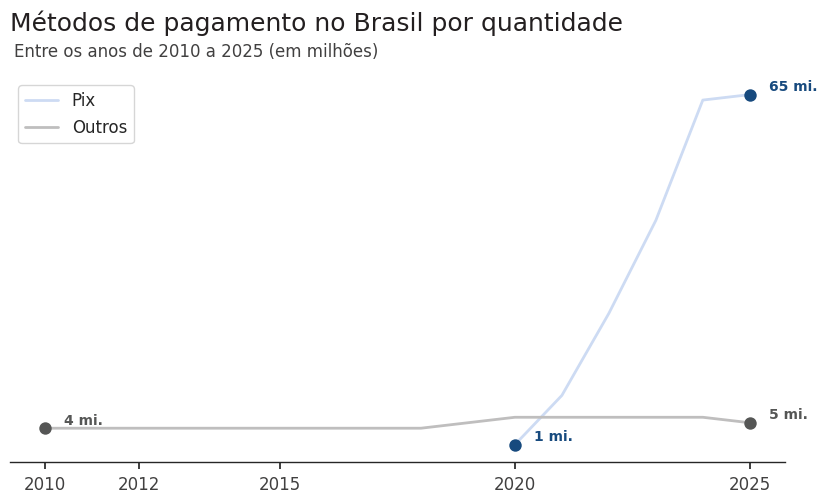

In [94]:
cores = [AZUL6, CINZA5]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=qtd_ano_mod,
                  x='Ano',
                  y=qtd_ano_mod['Quantidade'],
                  hue='MeioPagamento',
                  palette=cores,
                  lw=2,
                  legend=True)
ax.legend(title='', title_fontsize=10, fontsize=12)
ax.set_title('Métodos de pagamento no Brasil por quantidade',
             loc='left',
             fontsize=18,
             color=CINZA1,
             y=1.10)

ax.text(0.475, 1.065, 'Entre os anos de 2010 a 2025 (em milhões)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.tick_params(axis='x', which='both', bottom=True, top=False, length=5)
ax.set_xticks([2010, 2012, 2015, 2020, 2025])

sns.despine(left=True)

for spine in ax.spines.values():
    spine.set_linewidth(1)

cores_linha = [AZUL6, CINZA5]
cores_marker = [AZUL1, CINZA3]
anos_linha1 = [2020, 2025]
anos_linha2 = [2010, 2025]
anos_para_marcar = [anos_linha1, anos_linha2]

for line, cor_linha, cor_marker, anos in zip(ax.lines,
                                             cores_linha,
                                             cores_marker,
                                             anos_para_marcar):

    xs = line.get_xdata()
    ys = line.get_ydata()

    for ano in anos:
        idx = list(xs).index(ano)
        ax.scatter(xs[idx],
                   ys[idx],
                   s=60,
                   color=cor_marker,
                   edgecolor=cor_marker,
                   linewidth=1.2,
                   zorder=5)

        ax.text(xs[idx] + 0.4,
                ys[idx] + 0.7,
                s=f'{ys[idx]:.0f} mi.',
                color=cor_marker,
                weight='bold',
                fontsize=10)

plt.show()

### Análises pré-PIX

In [77]:
valor_ano_temp = valor_ano.copy()
valor_ano_temp = valor_ano_temp.melt(id_vars='Ano', var_name='MeioPagamento', value_name='Valor')

qtd_ano_temp = qtd_ano.copy()
qtd_ano_temp = qtd_ano_temp.melt(id_vars='Ano', var_name='MeioPagamento', value_name='Quantidade')

In [78]:
valor_qtd = pd.merge(valor_ano_temp, qtd_ano_temp, left_on=['Ano', 'MeioPagamento'], right_on=['Ano', 'MeioPagamento'],how='inner')

In [79]:
valor_qtd

,Ano,MeioPagamento,Valor,Quantidade
0,2010,Pix,0.00,0
1,2011,Pix,0.00,0
2,2012,Pix,0.00,0
3,2013,Pix,0.00,0
4,2014,Pix,0.00,0
...,...,...,...,...
91,2021,DOC,81410.28,104734
92,2022,DOC,55748.98,59019
93,2023,DOC,33542.21,35136
94,2024,DOC,650.79,663


In [80]:
no_pix = valor_qtd[~(valor_qtd['MeioPagamento'] == 'Pix')]

In [81]:
no_pix.MeioPagamento.unique()

array(['TED', 'TEC', 'Cheque', 'Boleto', 'DOC'], dtype=object)

In [82]:
no_pix_2019 = no_pix.query('Ano <= 2019')

In [83]:
no_pix_2019.Ano.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [84]:
no_pix_2019 = no_pix_2019.copy()
no_pix_2019['Quantidade'] = round(no_pix_2019['Quantidade'] / 1e6,2)
no_pix_2019['Valor'] = round(no_pix_2019['Valor']/1e6,2)

In [85]:
no_pix_2019.head()

,Ano,MeioPagamento,Valor,Quantidade
16,2010,TED,9.01,0.09
17,2011,TED,10.19,0.11
18,2012,TED,11.53,0.13
19,2013,TED,13.57,0.20
20,2014,TED,13.97,0.26


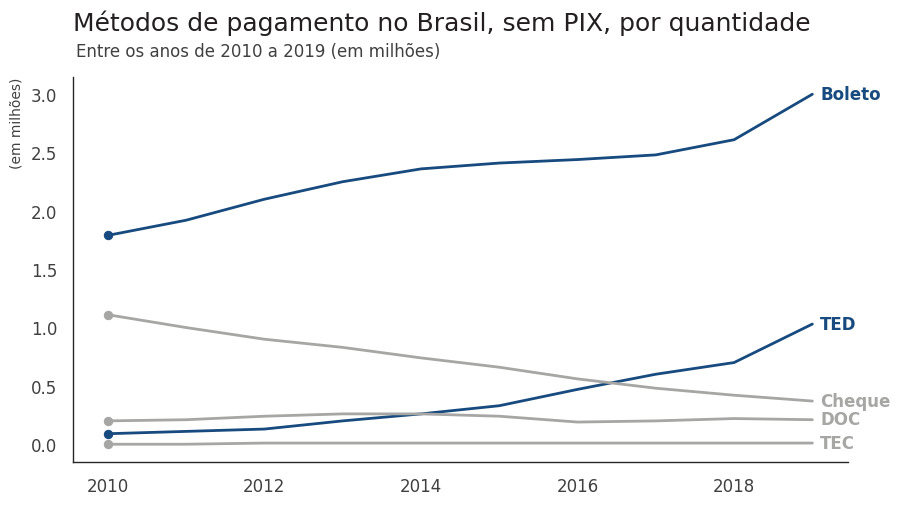

In [99]:
cores = [AZUL1, CINZA4, CINZA4, AZUL1, CINZA4]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=no_pix_2019,
                  x='Ano',
                  y=no_pix_2019['Quantidade'],
                  hue='MeioPagamento',
                  palette=cores,
                  lw=2,
                  legend=False)
marks = [0]

for line, cor in zip(ax.lines, cores):
    line.set_marker("o")
    line.set_markersize(6)
    line.set_markevery(marks)
    line.set_markerfacecolor(cor)
    line.set_markeredgecolor(cor)

ax.set_title('Métodos de pagamento no Brasil, sem PIX, por quantidade',
             loc='left',
             fontsize=18,
             color=CINZA1,
             y=1.10)

ax.text(0.475, 1.065, 'Entre os anos de 2010 a 2019 (em milhões)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

meios = no_pix_2019['MeioPagamento'].unique()

for meio, cor in zip(meios, cores):
    df_temp = no_pix_2019[no_pix_2019['MeioPagamento'] == meio]
    x_final = df_temp['Ano'].max()
    y_final = df_temp[df_temp['Ano'] == x_final]['Quantidade'].values[0]
    ax.text(
        x_final + 0.1,
        y_final,
        str(meio),
        color=cor,
        fontsize=12,
        va='center',
        fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('(em milhões)', fontsize=10, color=CINZA2, labelpad=5, loc='top')
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

sns.despine()
for spine in ax.spines.values():
    spine.set_linewidth(1)

plt.show()

### Média por operação

In [87]:
valor_qtd['Media'] = round(valor_qtd['Valor'] / valor_qtd['Quantidade'], 2)
valor_qtd

,Ano,MeioPagamento,Valor,Quantidade,Media
0,2010,Pix,0.00,0,NaN
1,2011,Pix,0.00,0,NaN
2,2012,Pix,0.00,0,NaN
3,2013,Pix,0.00,0,NaN
4,2014,Pix,0.00,0,NaN
...,...,...,...,...,...
91,2021,DOC,81410.28,104734,0.78
92,2022,DOC,55748.98,59019,0.94
93,2023,DOC,33542.21,35136,0.95
94,2024,DOC,650.79,663,0.98


In [88]:
media_pix = valor_qtd.copy()
media_pix = media_pix.query('MeioPagamento == "Pix"')
media_pix = media_pix.dropna(axis=0)
media_pix

,Ano,MeioPagamento,Valor,Quantidade,Media
10,2020,Pix,149894.91,176206,0.85
11,2021,Pix,5204116.61,9433523,0.55
12,2022,Pix,10890538.57,24033238,0.45
13,2023,Pix,17117257.36,41675591,0.41
14,2024,Pix,26404064.59,63439424,0.42
15,2025,Pix,28427181.78,64706005,0.44


In [89]:
media_ted = valor_qtd.copy()
media_ted = media_ted.query('MeioPagamento == "TED"')
media_ted

,Ano,MeioPagamento,Valor,Quantidade,Media
16,2010,TED,9012911.37,94168,95.71
17,2011,TED,10187969.87,113442,89.81
18,2012,TED,11534462.66,133257,86.56
19,2013,TED,13569819.23,199696,67.95
20,2014,TED,13967952.26,257399,54.27
21,2015,TED,15246550.07,329710,46.24
22,2016,TED,15459040.65,472586,32.71
23,2017,TED,16413626.05,599059,27.40
24,2018,TED,18880678.95,702488,26.88
25,2019,TED,23585864.67,1033377,22.82


In [90]:
media_total = valor_qtd.groupby('MeioPagamento')[['Media']].mean().sort_values('Media', ascending=False).reset_index()
media_total = media_total.round(2)
media_total

,MeioPagamento,Media
0,TED,49.38
1,Cheque,2.24
2,TEC,1.78
3,Boleto,1.24
4,DOC,0.81
5,Pix,0.52


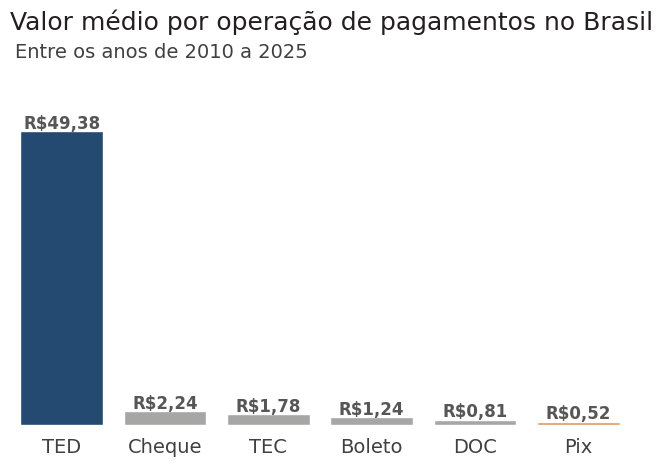

In [97]:
cores = []
for meio in media_total['MeioPagamento']:
    if meio in ['TED']:
        cores.append(AZUL1)
    elif meio == 'Pix':
        cores.append(LARANJA1)
    else:
        cores.append(CINZA4)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_theme(style='white')

ax = sns.barplot(data=media_total,
                 x='MeioPagamento',
                 y='Media',
                 palette=cores,
                 hue='MeioPagamento',
                 legend=False)

ax.set_title('Valor médio por operação de pagamentos no Brasil',
             fontsize=18,
             color=CINZA1,
             loc='left',
             pad=40,
             y=1.1)

ax.text(0.48, 1.21, 'Entre os anos de 2010 a 2025',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=14,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine(bottom=True, left=True)

ax.set_yticklabels([])

for i, valor in enumerate(media_total['Media']):
    qtd = f'R${valor:,.2f}'.replace('.',',')
    offset = 1.3
    ax.text(i, valor + offset, qtd, color=CINZA3, fontsize=12,
            ha='center', va='center', fontweight='bold')

plt.show()